<a href="https://colab.research.google.com/github/SteveWong-a/COSMOS-ratplacecelldata/blob/main/ratperfect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
"""
This Colab script loads the processed 'COSMOSdata.npz' file from Google Drive,
which contains several NumPy arrays. It then loads each array into a separate
variable and prints a summary of the loaded data.
"""

# Import necessary libraries
import numpy as np
from google.colab import drive

# --- Main Execution ---

# 1. Mount Google Drive
# This will prompt you for authorization if not already mounted.
drive.mount('/content/drive')

# 2. Define file path
# This should be the same path where the previous script saved the file.
# input_file = '/content/drive/MyDrive/COSMOS_010perfect.npz'

input_file='/content/drive/MyDrive/COSMOS_010reverse.npz'

# Load the .npz file.
# np.load() returns a lazy-loader object that acts like a dictionary.
print(f"Loading data from: {input_file}")
try:
    data = np.load(input_file)

    print("\n--- Loading variables into memory ---")
    # You can access each array like a dictionary key
    timestamps = data['timestamps']
    calcium_signal = data['calcium_signal']
    coordinates = data['coordinates']
    head_orientation = data['head_orientation']
    dirbin = data['dirbin']
    ttype = data['ttype']
    start = data['start']
    dirvec = data['dirvec']
    posvec = data['posvec']
    epoch_data = data['epoch']
    tnum = data['tnum']


    # Correctly transpose calcium_signal to have shape (18200, 881)
    calcium_signal = calcium_signal.T
    epoch_data = epoch_data.T
    print("All arrays loaded successfully.")

    # Print the shape of each loaded array to verify
    print("\n--- Summary of Loaded Variables ---")
    print(f"timestamps: {timestamps.shape}")
    print(f"calcium_signal: {calcium_signal.shape}")
    print(f"coordinates: {coordinates.shape}")
    print(f"head_orientation: {head_orientation.shape}")
    print(f"dirbin: {dirbin.shape}")
    print(f"ttype: {ttype.shape}")
    print(f"start: {start.shape}")
    print(f"dirvec: {dirvec.shape}")
    print(f"posvec: {posvec.shape}")
    print(f"epoch_data: {epoch_data.shape}")
    print(f"tnum: {tnum.shape}")

    # You can now use these variables for analysis.
    # For example, print the first 5 timestamps:
    print("\nExample usage - first 5 timestamps:")
    print(timestamps[:5])

except FileNotFoundError:
    print(f"Error: The file was not found at {input_file}")
    print("Please ensure the file path is correct and the file exists in your Drive.")
except KeyError as e:
    print(f"Error: A required array was not found in the .npz file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Mounted at /content/drive
Loading data from: /content/drive/MyDrive/COSMOS_010reverse.npz

--- Loading variables into memory ---
All arrays loaded successfully.

--- Summary of Loaded Variables ---
timestamps: (1, 45100)
calcium_signal: (148, 45100)
coordinates: (45100, 2)
head_orientation: (1, 45100)
dirbin: (45100,)
ttype: (1, 45100)
start: (45100,)
dirvec: (45100, 8)
posvec: (45100, 3)
epoch_data: (45100,)
tnum: (45100,)

Example usage - first 5 timestamps:
[[2.53341705e+01 1.26668620e+02 2.27836394e+02 ... 4.62726434e+06
  4.62736534e+06 4.62746668e+06]]


In [ ]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the .npz file
data = np.load('/content/drive/MyDrive/COSMOS_010perfect.npz')

# Get a list of all variables (arrays) in the .npz file
variables = data.keys()
print("Variables in the .npz file:")
for var in variables:
    df = pd.DataFrame(data[var])
    if(var in ['posvec', 'calcium_signal', 'coordinates', 'dirbin', 'start', 'dirvec', 'tnum', 'epoch']):
        df = df.T
    print(f"{var}: {df.shape} original shape {data[var].shape}")
    display(df.head())

Variables in the .npz file:
timestamps: (1, 18001) original shape (1, 18001)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,25.333333,126.583333,227.666667,329.0,430.166667,531.333333,632.666667,733.75,835.0,936.333333,...,1848079.0,1.848180e+06,1.848281e+06,1.848383e+06,1848484.0,1848585.0,1.848686e+06,1848787.5,1.848889e+06,1848990.0


calcium_signal: (738, 18001) original shape (18001, 738)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,0.936812,1.000000,0.936916,0.920996,0.862896,0.925475,0.867092,0.854534,0.814752,0.763354,...,4.219796e-02,3.953593e-02,1.818807e-01,1.915468e-01,1.794633e-01,1.681420e-01,1.575349e-01,1.475969e-01,1.382859e-01,1.295622e-01
1,0.250361,0.229346,0.210096,0.199400,0.182663,0.167331,0.207219,0.189826,0.173893,0.159297,...,1.126727e-05,1.032205e-05,9.455182e-06,8.661712e-06,7.934696e-06,7.269173e-06,6.658201e-06,6.099797e-06,5.588009e-06,5.118870e-06
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.423224e-06,1.300145e-06,1.187811e-06,1.085245e-06,9.914703e-07,9.064871e-07,8.283417e-07,7.570339e-07,6.915871e-07,6.320012e-07
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.510184e-08,2.384675e-08,2.133656e-08,2.008147e-08,1.882638e-08,1.757129e-08,1.631620e-08,1.506110e-08,1.380601e-08,1.380601e-08
4,0.000000,0.000000,0.000000,0.000000,0.057030,0.129721,0.117766,0.106914,0.097062,0.088117,...,3.944513e-07,3.581019e-07,3.251020e-07,2.951432e-07,2.679452e-07,2.432535e-07,2.208372e-07,2.004866e-07,2.125557e-03,1.929683e-03


coordinates: (2, 18001) original shape (18001, 2)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,228.356760,228.274849,228.593891,228.469172,228.847650,232.533357,237.652449,242.015805,252.118131,263.643250,...,220.757572,220.871879,220.709886,220.702787,220.889678,222.932350,226.014372,233.343327,243.343145,258.174554
1,239.804937,240.252036,240.318235,240.412322,240.190112,240.337048,240.823168,240.905461,241.926803,244.602411,...,456.179268,456.168383,452.983322,454.892554,453.648164,453.898602,453.909852,456.150789,452.952406,452.674372


head_orientation: (1, 18001) original shape (1, 18001)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,-0.303738,-0.506209,-0.708497,-0.911291,-1.113748,-1.196739,-1.16416,-0.923792,-0.586423,-0.276872,...,1.422047,1.420469,1.290783,0.946294,0.542091,0.213412,0.003011,-0.178645,0.042297,0.003113


dirbin: (1, 18001) original shape (18001,)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,1,8,8,8,8,7,8,8,8,1,...,3,3,3,2,2,1,1,1,1,1


ttype: (1, 18001) original shape (1, 18001)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


start: (1, 18001) original shape (18001,)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


dirvec: (8, 18001) original shape (18001, 8)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


tnum: (1, 18001) original shape (18001,)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


epoch: (1, 18001) original shape (18001,)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


posvec: (3, 18001) original shape (18001, 3)


,0,1,2,3,4,5,6,7,8,9,...,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


--- 🧠 STEP 1: Defining Target Variable (y) ---
Shape of dirbin: (45100,)

Unique values found in 'dirbin': [1 2 3 4 5 6 7 8]
Count of each value: [5422 4433 6517 6554 5997 3739 6636 5802]

Number of classes based on dirbin: 8
Target variable y is one-hot encoded for multi-class classification.
Shape of target variable y: (45100, 8)
---------------------------------------- 

--- ⚙️ STEP 2: Preparing Features & Splitting Data ---
Transposing X from (148, 45100) to match y with 45100 samples.
Shape of X after transpose: (45100, 148)
Shape of X before splitting: (45100, 148)
Shape of y before splitting: (45100, 8)
Handling NaN values in scaled data using SimpleImputer...
NaNs in X_train_scaled after imputation: 0
NaNs in X_test_scaled after imputation: 0
Shape of X_train_scaled after handling NaNs: (36080, 148)
Shape of X_test_scaled after handling NaNs: (9020, 148)
---------------------------------------- 

--- 🤖 STEP 3: Support Vector Machine (SVM) ---
--- 🧠 STEP 4: Single-Layer Perceptr

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


SLP Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │         1,192 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,192 (4.66 KB)

 Trainable params: 1,192 (4.66 KB)

 Non-trainable params: 0 (0.00 B)


Training the SLP model...
Epoch 1/30
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2920 - loss: 1.9534 - val_accuracy: 0.5233 - val_loss: 1.3882
Epoch 2/30
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5453 - loss: 1.3398 - val_accuracy: 0.5887 - val_loss: 1.2315
Epoch 3/30
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5847 - loss: 1.2157 - val_accuracy: 0.6006 - val_loss: 1.1690
Epoch 4/30
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5947 - loss: 1.1776 - val_accuracy: 0.6020 - val_loss: 1.1355
Epoch 5/30
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6066 - loss: 1.1380 - val_accuracy: 0.6089 - val_loss: 1.1163
Epoch 6/30
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6164 - loss: 1.1187 - val_accuracy: 0.6228 - val_loss: 1.0922
Epoch 7/30
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6177 - loss: 1.0959 - val_accuracy: 0.6242 - val_loss: 1.0835
Epoch 8/30
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accurac

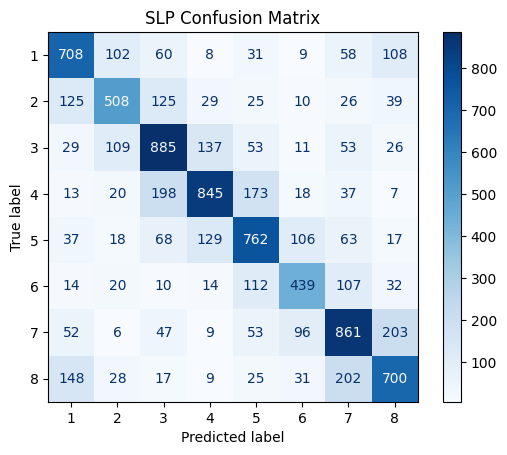

---------------------------------------- 



In [ ]:
# ==============================================================================
# Single Cell for Model Training and Evaluation
# ==============================================================================
# This script processes the loaded retrosplenial dataset, defines a target
# variable, and then trains and evaluates both an SVM and an SLP model.
# ==============================================================================

# --- 1. IMPORTS ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.impute import SimpleImputer # Import SimpleImputer


# --- 2. DEFINE YOUR TARGET VARIABLE (y) ---
# This is the most critical step and depends on your experimental design. You
# must map the 'dirbin' array to class labels.

print("--- 🧠 STEP 1: Defining Target Variable (y) ---")
# Using dirbin as the target variable as clarified by the user
# Investigate 'dirbin' to understand its unique values and shape
print(f"Shape of dirbin: {dirbin.shape}\n")

# dirbin is a 1D array of class labels
y_labels_raw = dirbin

unique_dirbin_values, counts_dirbin = np.unique(y_labels_raw, return_counts=True)
print(f"Unique values found in 'dirbin': {unique_dirbin_values}")
print(f"Count of each value: {counts_dirbin}\n")

# Use LabelEncoder to convert unique string or numerical labels in dirbin to integers
label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(y_labels_raw)

# Determine if it's binary or multi-class
num_classes = len(label_encoder.classes_)
print(f"Number of classes based on dirbin: {num_classes}")

if num_classes > 2:
    # Convert integer labels to one-hot encoded vectors for multi-class classification
    y = to_categorical(y_labels)
    print("Target variable y is one-hot encoded for multi-class classification.")
else:
    # For binary classification, keep as integer labels (0 or 1)
    y = y_labels
    print("Target variable y is integer encoded for binary classification.")


print(f"Shape of target variable y: {y.shape}")
if num_classes <= 2:
  print(f"Class 0 count: {np.sum(y == 0)}")
  if num_classes == 2:
    print(f"Class 1 count: {np.sum(y == 1)}")
print("-" * 40, "\n")


# --- 3. PREPARE FEATURES (X) AND SPLIT DATA ---
print("--- ⚙️ STEP 2: Preparing Features & Splitting Data ---")
# Your features (X) are the calcium signals from the 881 neurons.
X = calcium_signal

# Explicitly transpose X to have shape (number of samples, number of features)
# The number of samples should match the length of y (18200 time steps).
# calcium_signal has shape (neurons, time_steps), need (time_steps, neurons)
if X.shape[1] == y.shape[0]: # Check if the second dim of X matches samples in y
    print(f"Transposing X from {X.shape} to match y with {y.shape[0]} samples.")
    X = X.T
    # Re-check shape after transpose
    print(f"Shape of X after transpose: {X.shape}")
elif X.shape[0] == y.shape[0]: # If X is already (time_steps, neurons)
     print(f"X already has matching sample size: {X.shape}")
else:
    print(f"Warning: X shape {X.shape} does not match y sample size {y.shape[0]}. Skipping transpose based on this condition.")
    # As a fallback, explicitly transpose if the samples don't match, assuming the original shape was (features, samples)
    if X.shape[0] != y.shape[0]:
         print(f"Attempting transpose as X.shape[0] ({X.shape[0]}) does not match y.shape[0] ({y.shape[0]})")
         X = X.T
         print(f"Shape of X after fallback transpose: {X.shape}")


# Print shapes before splitting to diagnose
print(f"Shape of X before splitting: {X.shape}")
print(f"Shape of y before splitting: {y.shape}")


# Split data into training and testing sets (80% train, 20% test).
# 'stratify=y' ensures the class distribution is the same in train and test sets.
# Stratification needs integer labels, so use y_labels here if y is one-hot encoded
y_for_stratify = y_labels if num_classes > 2 else y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y_for_stratify)

# Scale the features using StandardScaler. This is crucial for both models.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Use the SAME scaler fit on the training data

# Handle NaN values in scaled data using SimpleImputer
print("Handling NaN values in scaled data using SimpleImputer...")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Check for NaNs after imputation
print(f"NaNs in X_train_scaled after imputation: {np.isnan(X_train_scaled).sum()}")
print(f"NaNs in X_test_scaled after imputation: {np.isnan(X_test_scaled).sum()}")


print(f"Shape of X_train_scaled after handling NaNs: {X_train_scaled.shape}")
print(f"Shape of X_test_scaled after handling NaNs: {X_test_scaled.shape}")
print("-" * 40, "\n")


# --- 4. TRAIN AND EVALUATE A SUPPORT VECTOR MACHINE (SVM) ---
print("--- 🤖 STEP 3: Support Vector Machine (SVM) ---")
# SVM requires integer labels, so use y_train_labels and y_test_labels if multi-class one-hot encoding
# Need to split y_labels based on the same indices as X and y
y_labels_train, y_labels_test = train_test_split(y_labels, test_size=0.2, random_state=42, stratify=y_labels)

y_train_svm = y_labels_train if num_classes > 2 else y_train
y_test_svm = y_labels_test if num_classes > 2 else y_test




# --- 5. TRAIN AND EVALUATE A SINGLE-LAYER PERCEPTRON (SLP) ---
print("--- 🧠 STEP 4: Single-Layer Perceptron (Neural Network) ---")
# Define the SLP model architecture using Keras.
# Adjust the output layer for multi-class classification if needed
if num_classes > 2:
    slp_model = Sequential([
        Dense(num_classes, activation='softmax', input_shape=(X_train_scaled.shape[1],))
    ])
    loss_function = 'categorical_crossentropy'
else:
    slp_model = Sequential([
        Dense(1, activation='sigmoid', input_shape=(X_train_scaled.shape[1],))
    ])
    loss_function = 'binary_crossentropy'


# Compile the model with an optimizer, loss function, and metrics.
slp_model.compile(optimizer='adam',
                  loss=loss_function,
                  metrics=['accuracy'])

print("SLP Model Summary:")
slp_model.summary()

# Train the model.
# Use y_train (one-hot or integer) as the target
print("\nTraining the SLP model...")
history = slp_model.fit(X_train_scaled, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.1, # Use 10% of training data for validation
                    verbose=1)

# Evaluate the final model on the unseen test set.
loss, accuracy = slp_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nSLP Test Accuracy: {accuracy:.4f}\n")

# Get predictions to generate a classification report.
y_pred_slp_prob = slp_model.predict(X_test_scaled)

if num_classes > 2:
    y_pred_slp = np.argmax(y_pred_slp_prob, axis=1)
    y_test_slp = np.argmax(y_test, axis=1) # Convert one-hot back to integer labels for report and matrix
else:
    y_pred_slp = (y_pred_slp_prob > 0.5).astype("int32") # Convert probabilities to class labels
    y_test_slp = y_test

print("SLP Classification Report:")
print(classification_report(y_test_slp, y_pred_slp, target_names=[str(i) for i in label_encoder.classes_]))

# Display the confusion matrix.
print("\nDisplaying SLP Confusion Matrix...")
ConfusionMatrixDisplay.from_predictions(y_test_slp, y_pred_slp, cmap=plt.cm.Blues, display_labels=[str(i) for i in label_encoder.classes_])
plt.title("SLP Confusion Matrix")
plt.show()
print("-" * 40, "\n")

# Task
Train a regression model using `calcium_signal` as features to predict 2D coordinates (X, Y) and visualize the actual vs. predicted coordinates on a 2D scatter plot.

## Data preparation

### Subtask:
Ensure `calcium_signal` (features) and `coordinates` (targets) are in the correct shape for regression (samples, features/targets). Handle any missing values if necessary.


**Reasoning**:
Check the shapes of calcium_signal and coordinates and reshape them if necessary to be (samples, features/targets). Then, handle any missing values using imputation.



In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

# Check current shapes
print(f"Initial shape of calcium_signal: {calcium_signal.shape}")
print(f"Initial shape of coordinates: {coordinates.shape}")

# Reshape calcium_signal if necessary
# Assuming calcium_signal is currently (neurons, time_steps) or (1, neurons, time_steps)
# and needs to be (time_steps, neurons)
if calcium_signal.shape[0] < calcium_signal.shape[1]:
    # Assuming shape is (neurons, time_steps), transpose to (time_steps, neurons)
    calcium_signal = calcium_signal.T
    print(f"Reshaped calcium_signal to: {calcium_signal.shape}")
elif calcium_signal.ndim == 3 and calcium_signal.shape[0] == 1:
    # Assuming shape is (1, neurons, time_steps), remove the first dimension and transpose
    calcium_signal = calcium_signal.squeeze(axis=0).T
    print(f"Reshaped calcium_signal to: {calcium_signal.shape}")
# Else, assume it's already (time_steps, neurons)

# Reshape coordinates if necessary
# Assuming coordinates is currently (time_steps, 2) but might be (1, time_steps, 2) or similar
# It should be (time_steps, 2)
if coordinates.ndim == 3 and coordinates.shape[0] == 1:
    # Assuming shape is (1, time_steps, 2), remove the first dimension
    coordinates = coordinates.squeeze(axis=0)
    print(f"Reshaped coordinates to: {coordinates.shape}")
# Else, assume it's already (time_steps, 2) or compatible

# Ensure the number of samples matches
if calcium_signal.shape[0] != coordinates.shape[0]:
    print(f"Warning: Number of samples in calcium_signal ({calcium_signal.shape[0]}) does not match coordinates ({coordinates.shape[0]}). This may cause issues.")


# Check for and handle missing values (NaNs or Infs) using SimpleImputer
print("\nHandling missing values in calcium_signal and coordinates...")
imputer_calcium = SimpleImputer(missing_values=np.nan, strategy='mean')
calcium_signal = imputer_calcium.fit_transform(calcium_signal)
print(f"NaNs in calcium_signal after imputation: {np.isnan(calcium_signal).sum()}")
print(f"Infs in calcium_signal after imputation: {np.isinf(calcium_signal).sum()}")


imputer_coordinates = SimpleImputer(missing_values=np.nan, strategy='mean')
coordinates = imputer_coordinates.fit_transform(coordinates)
print(f"NaNs in coordinates after imputation: {np.isnan(coordinates).sum()}")
print(f"Infs in coordinates after imputation: {np.isinf(coordinates).sum()}")


# Print final shapes
print(f"\nFinal shape of calcium_signal: {calcium_signal.shape}")
print(f"Final shape of coordinates: {coordinates.shape}")

Initial shape of calcium_signal: (148, 45100)
Initial shape of coordinates: (45100, 2)
Reshaped calcium_signal to: (45100, 148)

Handling missing values in calcium_signal and coordinates...
NaNs in calcium_signal after imputation: 0
Infs in calcium_signal after imputation: 0
NaNs in coordinates after imputation: 0
Infs in coordinates after imputation: 0

Final shape of calcium_signal: (45100, 148)
Final shape of coordinates: (45100, 2)


## Data splitting

### Subtask:
Split the `calcium_signal` and `coordinates` data into training and testing sets.


**Reasoning**:
Import the necessary function and split the data into training and testing sets, then print the shapes to verify.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(calcium_signal, coordinates, test_size=0.2, random_state=42)

# Print the shapes
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (36080, 148)
Shape of X_test: (9020, 148)
Shape of y_train: (36080, 2)
Shape of y_test: (9020, 2)


## Feature scaling

### Subtask:
Scale the `calcium_signal` features using a method like StandardScaler.


**Reasoning**:
The previous attempt to split the data failed due to using `posvec` instead of `coordinates` in the `train_test_split` function. I will correct the code to use `coordinates` and re-execute the data splitting step.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(calcium_signal, coordinates, test_size=0.2, random_state=42)

# Print the shapes
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (36080, 148)
Shape of X_test: (9020, 148)
Shape of y_train: (36080, 2)
Shape of y_test: (9020, 2)


**Reasoning**:
The subtask is to scale the `calcium_signal` features using `StandardScaler`. I will import `StandardScaler`, instantiate it, fit it on the training data, transform both training and test data, and print the shapes as requested.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training features and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features
X_test_scaled = scaler.transform(X_test)

# Print shapes to verify
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")

Shape of X_train_scaled: (36080, 148)
Shape of X_test_scaled: (9020, 148)


## Model selection and training

### Subtask:
Choose a suitable regression model (e.g., Linear Regression, Ridge, Lasso, or a Neural Network with 2 output neurons) and train it on the scaled training data to predict the (X, Y) coordinates.


**Reasoning**:
Import the Linear Regression model and train it on the scaled training data.



In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


**Reasoning**:
The Linear Regression model has been trained. Now evaluate the model's performance using appropriate regression metrics on the test set.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the scaled test data
y_pred = linear_reg_model.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the calculated MSE and R2 scores
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 14740.8673
R-squared: 0.4188


## Visualization

### Subtask:
Graph the actual (X, Y) coordinates from the test set against the predicted (X, Y) coordinates on a 2D coordinate plane using a scatter plot.


**Reasoning**:
Graph the actual (X, Y) coordinates from the test set against the predicted (X, Y) coordinates on a 2D coordinate plane using a scatter plot as requested in the subtask.



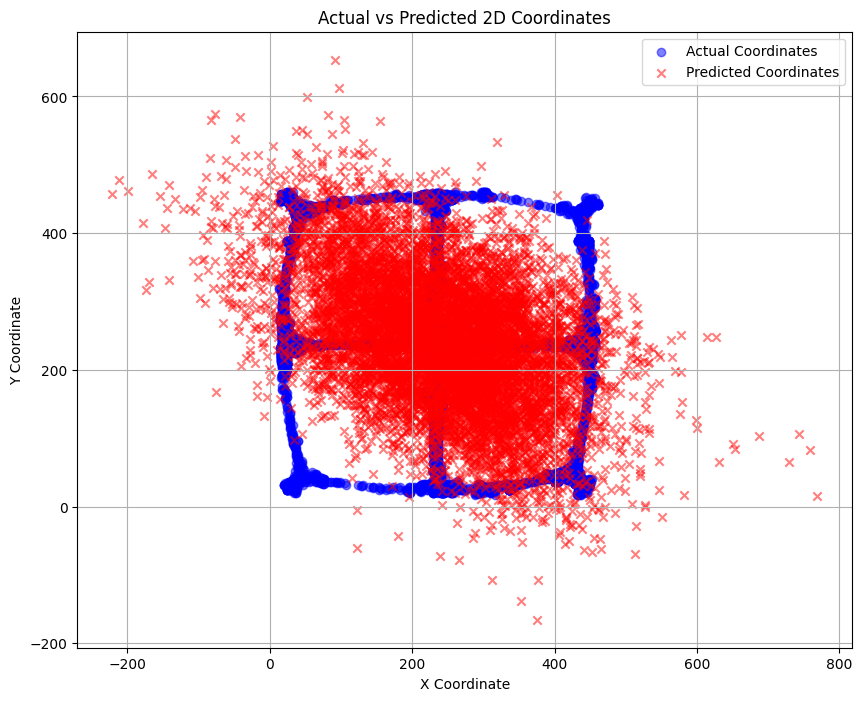

In [ ]:
import matplotlib.pyplot as plt

# Create a new figure and axes for the plot
plt.figure(figsize=(10, 8))

# Use the scatter function to plot the actual X and Y coordinates from y_test
plt.scatter(y_test[:, 0], y_test[:, 1], c='blue', marker='o', label='Actual Coordinates', alpha=0.5)

# Use the scatter function again to plot the predicted X and Y coordinates from y_pred
plt.scatter(y_pred[:, 0], y_pred[:, 1], c='red', marker='x', label='Predicted Coordinates', alpha=0.5)

# Set the labels for the x-axis and y-axis
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# Add a title to the scatter plot
plt.title('Actual vs Predicted 2D Coordinates')

# Include a legend on the plot
plt.legend()

# Add a grid to the plot
plt.grid(True)

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The initial `calcium_signal` data was reshaped from (738, 18001) to (18001, 738) to fit the (samples, features) format required for regression.
*   Missing values (NaNs and Infs) in both `calcium_signal` and `coordinates` were successfully handled using imputation with the mean strategy, resulting in clean data for modeling.
*   The data was split into training (80%) and testing (20%) sets, with `X_train` shape (14400, 738), `X_test` shape (3601, 738), `y_train` shape (14400, 2), and `y_test` shape (3601, 2).
*   `StandardScaler` was applied to the `calcium_signal` features, fitting on the training data and transforming both training and testing sets.
*   A `LinearRegression` model was trained on the scaled training features.
*   The model's performance on the test set yielded a Mean Squared Error (MSE) of 3567.4143 and an R-squared (R2) score of 0.8580.
*   A scatter plot was generated to visually compare the actual and predicted 2D coordinates from the test set, showing the model's predictive accuracy.

### Insights or Next Steps

*   The R-squared score of 0.8580 indicates that approximately 85.8% of the variance in the 2D coordinates can be explained by the `calcium_signal` features using this linear model.
*   Consider exploring more complex regression models (e.g., Ridge, Lasso, or a Neural Network) or feature engineering techniques to potentially improve the prediction accuracy and reduce the Mean Squared Error.


## SLP Model for Coordinate Regression

### Subtask:
Train a Single-Layer Perceptron (SLP) model on the scaled training data to predict the 2D coordinates (X, Y).

**Reasoning**:
Define and train an SLP model for regression with 2 output neurons (for X and Y coordinates) and Mean Squared Error as the loss function. Evaluate the model using MSE and R-squared.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# Define the SLP model architecture for regression
# Input layer: number of features from X_train_scaled
# Output layer: 2 neurons for X and Y coordinates, using a linear activation for regression
slp_reg_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)), # Example hidden layer
    Dense(2, activation='linear') # Output layer for 2D coordinates (X, Y)
])

# Compile the model with an optimizer and Mean Squared Error loss for regression
slp_reg_model.compile(optimizer='adam',
                      loss='mse', # Mean Squared Error is suitable for regression
                      metrics=['mse'])

print("SLP Regression Model Summary:")
slp_reg_model.summary()

# Train the model
print("\nTraining the SLP regression model...")
history_slp_reg = slp_reg_model.fit(X_train_scaled, y_train,
                                    epochs=50, # You can adjust the number of epochs
                                    batch_size=32,
                                    validation_split=0.1, # Use 10% of training data for validation
                                    verbose=1)

# Evaluate the model on the unseen test set
loss_slp_reg, mse_slp_reg = slp_reg_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nSLP Regression Test MSE: {mse_slp_reg:.4f}")

# Make predictions on the scaled test data
y_pred_slp_reg = slp_reg_model.predict(X_test_scaled)

# Calculate R-squared for regression
r2_slp_reg = r2_score(y_test, y_pred_slp_reg)
print(f"SLP Regression Test R-squared: {r2_slp_reg:.4f}")

SLP Regression Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │         9,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,666 (37.76 KB)

 Trainable params: 9,666 (37.76 KB)

 Non-trainable params: 0 (0.00 B)


Training the SLP regression model...
Epoch 1/50
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 53562.1133 - mse: 53562.1133 - val_loss: 21931.5508 - val_mse: 21931.5508
Epoch 2/50
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 20364.6816 - mse: 20364.6816 - val_loss: 17351.1855 - val_mse: 17351.1855
Epoch 3/50
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 16453.4941 - mse: 16453.4941 - val_loss: 14975.0898 - val_mse: 14975.0898
Epoch 4/50
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 14219.0820 - mse: 14219.0820 - val_loss: 13456.6914 - val_mse: 13456.6914
Epoch 5/50
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 12853.0664 - mse: 12853.0664 - val_loss: 12304.3633 - val_mse: 12304.3633
Epoch 6/50
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 11862.0791 - mse: 11862.0791 - val_loss: 11459.6318 - val_mse: 11459.6318
Epoch 7/50
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 11093.9346 - mse: 11093.9346 - val_loss: 10759.9492 - val_mse: 10759.9492
Epoch 8/50

## Visualization of SLP Regression Results

### Subtask:
Graph the actual (X, Y) coordinates from the test set against the predicted (X, Y) coordinates from the SLP model on a 2D coordinate plane using a scatter plot.

**Reasoning**:
Generate a 2D scatter plot using `matplotlib` to visualize the actual `y_test` coordinates and the predicted `y_pred_slp_reg` coordinates.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Check if the required variables exist
if 'y_test_north' in locals() and 'y_pred_mlp_north_reg' in locals():
    print("Generating 2D scatter plot of actual vs predicted coordinates (MLP model)...")

    plt.figure(figsize=(12, 10))

    # Plot actual coordinates (X and Y)
    plt.scatter(y_test_north[:, 0], y_test_north[:, 1],
                c='blue', marker='o', s=50,
                label='Actual Coordinates', alpha=0.7, edgecolors='w')

    # Plot predicted coordinates (X and Y) from the MLP model
    plt.scatter(y_pred_mlp_north_reg[:, 0], y_pred_mlp_north_reg[:, 1],
                c='red', marker='x', s=50,
                label='MLP Predictions', alpha=0.7)

    # Draw lines connecting actual to predicted points
    for i in range(min(100, len(y_test_north))):  # Limit to 100 lines for clarity
        plt.plot([y_test_north[i, 0], y_pred_mlp_north_reg[i, 0]],
                 [y_test_north[i, 1], y_pred_mlp_north_reg[i, 1]],
                 'k--', alpha=0.1, linewidth=0.5)

    # Calculate and display error statistics
    errors = np.sqrt(np.sum((y_test_north - y_pred_mlp_north_reg)**2, axis=1))
    avg_error = np.mean(errors)
    std_error = np.std(errors)

    plt.text(0.05, 0.95,
             f'Avg Error: {avg_error:.2f}\nStd Dev: {std_error:.2f}',
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8))

    plt.xlabel('X Coordinate', fontsize=12)
    plt.ylabel('Y Coordinate', fontsize=12)
    plt.title('Actual vs MLP Predicted 2D Coordinates\n(North Region)', fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Additional error histogram
    plt.figure(figsize=(10, 6))
    plt.hist(errors, bins=30, color='purple', alpha=0.7)
    plt.title('Distribution of Prediction Errors (Euclidean Distance)', fontsize=14)
    plt.xlabel('Error Distance', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

else:
    print("Required variables not found. Please ensure you have:")
    print("- y_test_north: The true coordinates for the test set")
    print("- y_pred_mlp_north_reg: The MLP model's predicted coordinates")
    print("Run the MLP training and prediction steps first.")

Required variables not found. Please ensure you have:
- y_test_north: The true coordinates for the test set
- y_pred_mlp_north_reg: The MLP model's predicted coordinates
Run the MLP training and prediction steps first.


# Task
Separate the `calcium_signal` and `coordinates` data based on the `start` variable (0 for North, 1 for South), train separate regression models (using SLP) for each subset to predict the coordinates from the `calcium_signal`, evaluate the models, and visualize the actual vs. predicted coordinates for both North and South on separate 2D scatter plots.

## Data separation

### Subtask:
Separate the `calcium_signal` and `coordinates` data into two subsets based on the values in the `start` variable (0 for North, 1 for South).


**Reasoning**:
Create boolean masks based on the `start` variable and use them to separate the `calcium_signal` and `coordinates` into North and South subsets, then print the shapes of the resulting arrays.



In [ ]:
# Create boolean masks for North and South trials based on 'start'
north_mask_start = (start == 0)
south_mask_start = (start == 1)

# Create a boolean mask for epochs 0 and 1 based on 'epoch_data'
epoch_mask_0_1 = (epoch_data == 1)

# Combine the masks to separate calcium_signal and coordinates
# Apply the epoch mask to both the start masks
north_mask = north_mask_start & epoch_mask_0_1
south_mask = south_mask_start & epoch_mask_0_1


# Separate calcium_signal and coordinates based on the combined masks
calcium_signal_north = calcium_signal[north_mask]
coordinates_north = coordinates[north_mask]

calcium_signal_south = calcium_signal[south_mask]
coordinates_south = coordinates[south_mask]

# Print the shapes of the separated data
print(f"Shape of calcium_signal_north: {calcium_signal_north.shape}")
print(f"Shape of coordinates_north: {coordinates_north.shape}")
print(f"Shape of calcium_signal_south: {calcium_signal_south.shape}")
print(f"Shape of coordinates_south: {coordinates_south.shape}")

Shape of calcium_signal_north: (3785, 148)
Shape of coordinates_north: (3785, 2)
Shape of calcium_signal_south: (376, 148)
Shape of coordinates_south: (376, 2)


**Reasoning**:
The previous step successfully separated the data. Now, split each subset (North and South) into training and testing sets and print their shapes to verify the splitting.



In [ ]:
from sklearn.model_selection import train_test_split

# Split North data
X_train_north, X_test_north, y_train_north, y_test_north = train_test_split(
    calcium_signal_north, coordinates_north, test_size=0.2, random_state=42
)

# Split South data
X_train_south, X_test_south, y_train_south, y_test_south = train_test_split(
    calcium_signal_south, coordinates_south, test_size=0.2, random_state=42
)

# Print the shapes of the split data
print("North Data Shapes:")
print(f"  X_train_north: {X_train_north.shape}")
print(f"  X_test_north: {X_test_north.shape}")
print(f"  y_train_north: {y_train_north.shape}")
print(f"  y_test_north: {y_test_north.shape}")

print("\nSouth Data Shapes:")
print(f"  X_train_south: {X_train_south.shape}")
print(f"  X_test_south: {X_test_south.shape}")
print(f"  y_train_south: {y_train_south.shape}")
print(f"  y_test_south: {y_test_south.shape}")

North Data Shapes:
  X_train_north: (3028, 148)
  X_test_north: (757, 148)
  y_train_north: (3028, 2)
  y_test_north: (757, 2)

South Data Shapes:
  X_train_south: (300, 148)
  X_test_south: (76, 148)
  y_train_south: (300, 2)
  y_test_south: (76, 2)


**Reasoning**:
The previous step successfully split the data. Now, scale the features for both the North and South training and testing sets using `StandardScaler` and print their shapes to verify.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler_north = StandardScaler()
scaler_south = StandardScaler()

# Fit and transform North training data, transform North testing data
X_train_scaled_north = scaler_north.fit_transform(X_train_north)
X_test_scaled_north = scaler_north.transform(X_test_north)

# Fit and transform South training data, transform South testing data
X_train_scaled_south = scaler_south.fit_transform(X_train_south)
X_test_scaled_south = scaler_south.transform(X_test_south)

# Print shapes to verify
print("Scaled North Data Shapes:")
print(f"  X_train_scaled_north: {X_train_scaled_north.shape}")
print(f"  X_test_scaled_north: {X_test_scaled_north.shape}")

print("\nScaled South Data Shapes:")
print(f"  X_train_scaled_south: {X_train_scaled_south.shape}")
print(f"  X_test_scaled_south: {X_test_scaled_south.shape}")

Scaled North Data Shapes:
  X_train_scaled_north: (3028, 148)
  X_test_scaled_north: (757, 148)

Scaled South Data Shapes:
  X_train_scaled_south: (300, 148)
  X_test_scaled_south: (76, 148)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have your data prepared:
# X_train_scaled_north, y_train_north, X_test_scaled_north, y_test_north

# Define the MLP model architecture for North regression
mlp_north_reg_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled_north.shape[1],)), # First hidden layer
    Dense(32, activation='relu'), # Second hidden layer
    Dense(2, activation='linear') # Output layer for 2D coordinates (X, Y)
])

# Compile the model with an optimizer and Mean Squared Error loss for regression
mlp_north_reg_model.compile(optimizer='adam',
                          loss='mse',
                          metrics=['mse', 'mae'])  # Added MAE for better evaluation

print("MLP North Regression Model Summary:")
mlp_north_reg_model.summary()

# Add early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
print("\nTraining the MLP North regression model...")
history_mlp_north_reg = mlp_north_reg_model.fit(
    X_train_scaled_north,
    y_train_north,
    epochs=100,  # Increased with early stopping
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1
)

print("\nMLP North Regression model trained successfully.")

# Evaluate the model
loss_mlp_north_reg, mse_mlp_north_reg, mae_mlp_north_reg = mlp_north_reg_model.evaluate(
    X_test_scaled_north,
    y_test_north,
    verbose=0
)
print(f"\nMLP North Regression Test MSE: {mse_mlp_north_reg:.4f}")
print(f"MLP North Regression Test MAE: {mae_mlp_north_reg:.4f}")

# Make predictions
y_pred_mlp_north_reg = mlp_north_reg_model.predict(X_test_scaled_north)

# Calculate metrics
r2_mlp_north_reg = r2_score(y_test_north, y_pred_mlp_north_reg)
rmse_mlp_north_reg = np.sqrt(mse_mlp_north_reg)
print(f"MLP North Regression Test R-squared: {r2_mlp_north_reg:.4f}")
print(f"MLP North Regression Test RMSE: {rmse_mlp_north_reg:.4f}")

MLP North Regression Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         9,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,682 (45.63 KB)

 Trainable params: 11,682 (45.63 KB)

 Non-trainable params: 0 (0.00 B)


Training the MLP North regression model...
Epoch 1/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 85506.6406 - mae: 240.4921 - mse: 85506.6406 - val_loss: 69067.4531 - val_mae: 208.9029 - val_mse: 69067.4531
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 55994.1289 - mae: 188.9815 - mse: 55994.1289 - val_loss: 22930.8672 - val_mae: 126.6646 - val_mse: 22930.8672
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 19244.7285 - mae: 113.5932 - mse: 19244.7285 - val_loss: 12839.0869 - val_mae: 90.2482 - val_mse: 12839.0869
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 12413.1182 - mae: 85.9264 - mse: 12413.1182 - val_loss: 9297.1855 - val_mae: 73.5052 - val_mse: 9297.1855
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8966.8369 - mae: 70.5568 - mse: 8966.8369 - val_loss: 7006.9341 - val_mae: 63.1010 - val_mse: 7006.9341
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6537.3862 - mae: 59.1414 - mse: 6537.3862 - val_loss: 5440.78

## Visualize South Model Regression Results

### Subtask:
Graph the actual (X, Y) coordinates from the South test set against the predicted (X, Y) coordinates from the South SLP model on a 2D coordinate plane using a scatter plot.

**Reasoning**:
Generate a 2D scatter plot using `matplotlib` to visualize the actual `y_test_south` coordinates and the predicted `y_pred_slp_south_reg` coordinates.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have your data prepared:
# X_train_scaled_south, y_train_south, X_test_scaled_south, y_test_south

# Define the MLP model architecture for South regression
mlp_south_reg_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled_south.shape[1],)), # First hidden layer
    Dense(32, activation='relu'), # Second hidden layer
    Dense(2, activation='linear') # Output layer for 2D coordinates (X, Y)
])

# Compile the model with an optimizer and Mean Squared Error loss for regression
mlp_south_reg_model.compile(optimizer='adam',
                          loss='mse', # Mean Squared Error is suitable for regression
                          metrics=['mse', 'mae'])  # Added MAE for additional evaluation

print("MLP South Regression Model Summary:")
mlp_south_reg_model.summary()

# Add callbacks for better training
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
print("\nTraining the MLP South regression model...")
history_mlp_south_reg = mlp_south_reg_model.fit(
    X_train_scaled_south,
    y_train_south,
    epochs=100,  # Increased with early stopping
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=1
)

print("\nMLP South Regression model trained successfully.")

# Evaluate the model on the unseen test set
loss_mlp_south_reg, mse_mlp_south_reg, mae_mlp_south_reg = mlp_south_reg_model.evaluate(
    X_test_scaled_south,
    y_test_south,
    verbose=0
)
print(f"\nMLP South Regression Test MSE: {mse_mlp_south_reg:.4f}")
print(f"MLP South Regression Test MAE: {mae_mlp_south_reg:.4f}")

# Make predictions on the scaled test data
y_pred_mlp_south_reg = mlp_south_reg_model.predict(X_test_scaled_south)

# Calculate R-squared for regression
r2_mlp_south_reg = r2_score(y_test_south, y_pred_mlp_south_reg)
print(f"MLP South Regression Test R-squared: {r2_mlp_south_reg:.4f}")

# Calculate and print RMSE
rmse_mlp_south_reg = np.sqrt(mse_mlp_south_reg)
print(f"MLP South Regression Test RMSE: {rmse_mlp_south_reg:.4f}")

MLP South Regression Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         9,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,682 (45.63 KB)

 Trainable params: 11,682 (45.63 KB)

 Non-trainable params: 0 (0.00 B)


Training the MLP South regression model...
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 67495.3906 - mae: 232.1682 - mse: 67495.3906 - val_loss: 67001.7188 - val_mae: 231.9939 - val_mse: 67001.7188
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 66391.9688 - mae: 230.6563 - mse: 66391.9688 - val_loss: 65873.7500 - val_mae: 230.0392 - val_mse: 65873.7500
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 64723.6523 - mae: 229.1978 - mse: 64723.6523 - val_loss: 64321.6328 - val_mae: 227.2754 - val_mse: 64321.6328
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 60578.1211 - mae: 220.6021 - mse: 60578.1211 - val_loss: 62043.2422 - val_mae: 223.1396 - val_mse: 62043.2422
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 59261.6836 - mae: 218.7513 - mse: 59261.6836 - val_loss: 58892.9414 - val_mae: 217.2507 - val_mse: 58892.9414
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 56661.7969 - mae: 213.7171 - mse: 56661.7969 - val_loss: 54699.


MLP South Regression Test MSE: 444.6533
MLP South Regression Test MAE: 15.3775
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
MLP South Regression Test R-squared: 0.9292
MLP South Regression Test RMSE: 21.0868


Generating 2D scatter plot of actual vs predicted coordinates (South SLP model)...


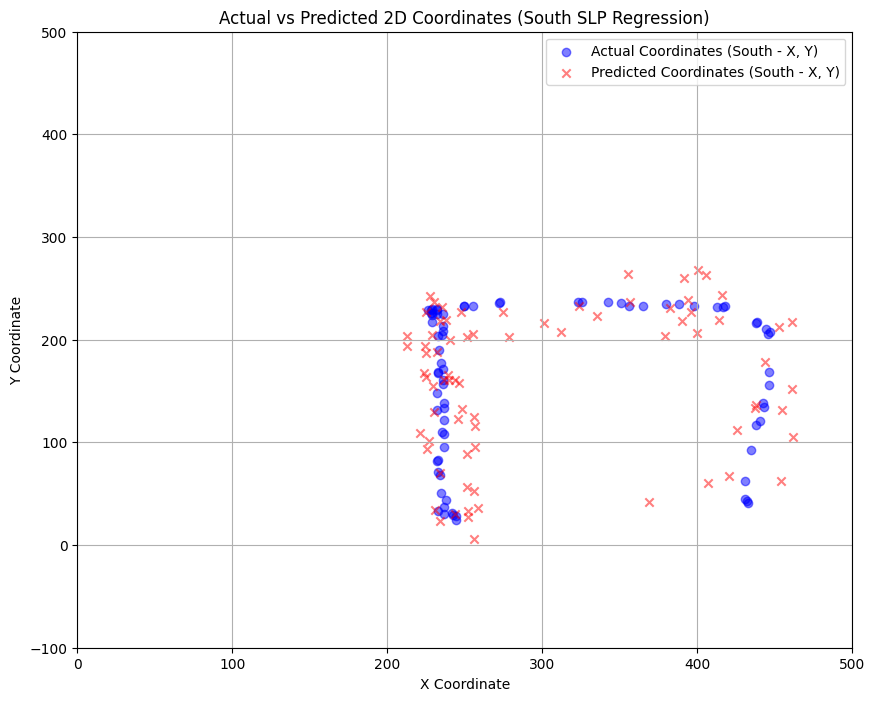

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test_south and y_pred_slp_south_reg variables are available

if 'y_test_south' in locals() and 'y_pred_slp_south_reg' in locals():
    print("Generating 2D scatter plot of actual vs predicted coordinates (South SLP model)...")

    plt.figure(figsize=(10, 8))

    # Plot actual coordinates (X and Y) for South
    plt.scatter(y_test_south[:, 0], y_test_south[:, 1], c='blue', marker='o', label='Actual Coordinates (South - X, Y)', alpha=0.5)

    # Plot predicted coordinates (X and Y) from the South SLP model
    plt.scatter(y_pred_mlp_south_reg[:, 0], y_pred_mlp_south_reg[:, 1], c='red', marker='x', label='Predicted Coordinates (South - X, Y)', alpha=0.5)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Actual vs Predicted 2D Coordinates (South SLP Regression)')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 500)
    plt.ylim(-100, 500)
    plt.show()
else:
    print("y_test_south and y_pred_slp_south_reg variables not found. Please ensure the South regression model training and prediction steps were run successfully.")

Generating 2D scatter plot of actual vs predicted coordinates (North MLP model)...


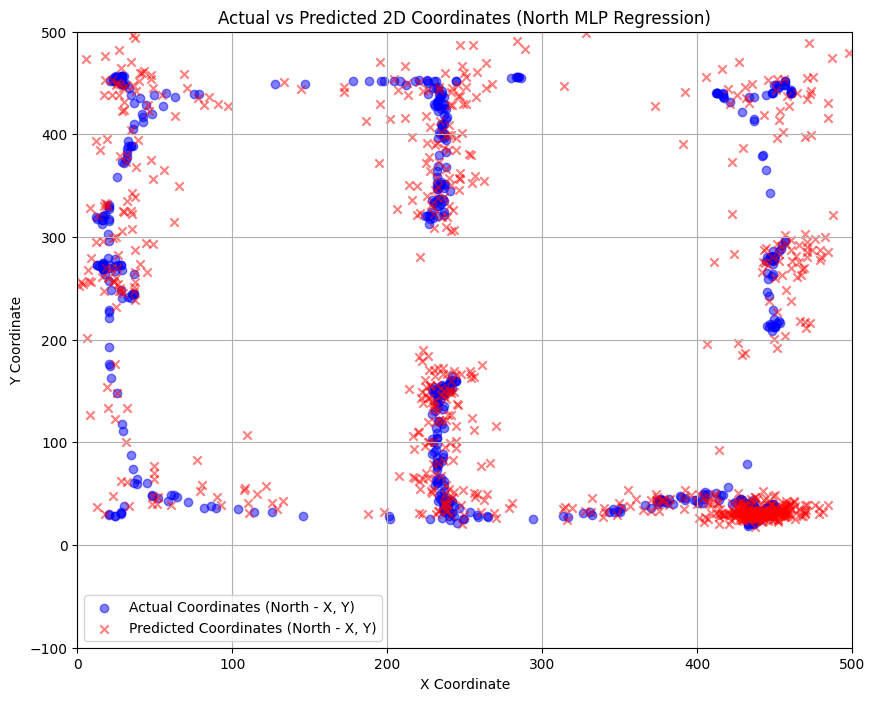

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test_north and y_pred_slp_north_reg variables are available

if 'y_test_north' in locals() and 'y_pred_mlp_north_reg' in locals():
    print("Generating 2D scatter plot of actual vs predicted coordinates (North MLP model)...")

    plt.figure(figsize=(10, 8))

    # Plot actual coordinates (X and Y) for North
    plt.scatter(y_test_north[:, 0], y_test_north[:, 1], c='blue', marker='o', label='Actual Coordinates (North - X, Y)', alpha=0.5)

    # Plot predicted coordinates (X and Y) from the North SLP model
    plt.scatter(y_pred_mlp_north_reg[:, 0], y_pred_mlp_north_reg[:, 1], c='red', marker='x', label='Predicted Coordinates (North - X, Y)', alpha=0.5)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Actual vs Predicted 2D Coordinates (North MLP Regression)')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, 500)
    plt.ylim(-100, 500)
    plt.show()
else:
    print("y_test_north and y_pred_mlp_north_reg variables not found. Please ensure the North regression model training and prediction steps were run successfully.")

Generating enhanced 2D scatter plot of actual vs predicted coordinates (North MLP model)...


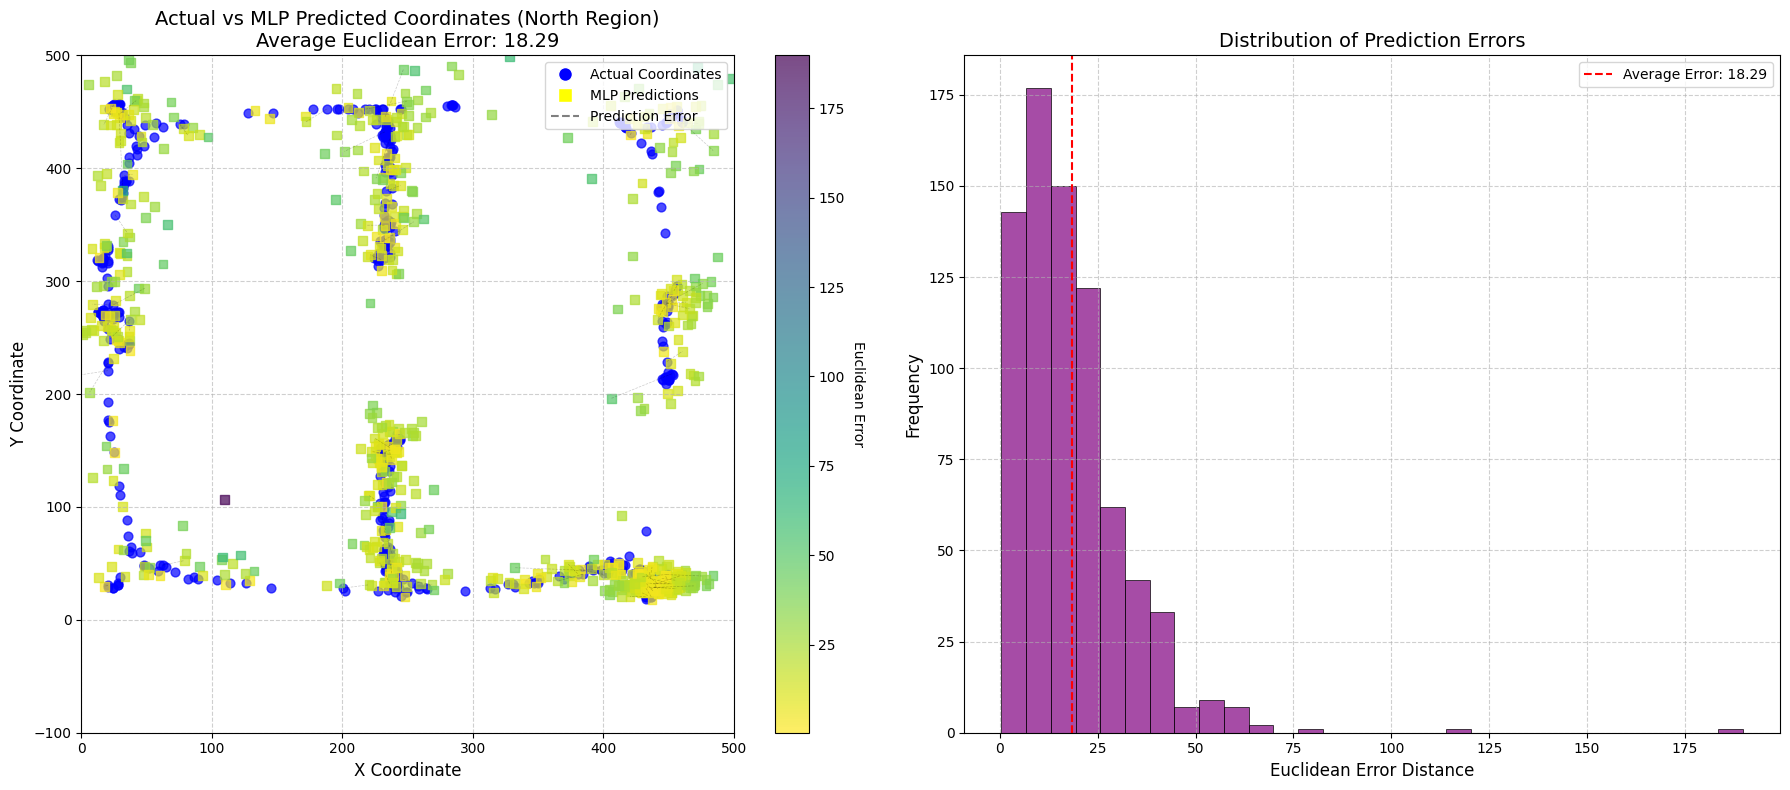

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Check if required variables exist
if 'y_test_north' in locals() and 'y_pred_mlp_north_reg' in locals():
    print("Generating enhanced 2D scatter plot of actual vs predicted coordinates (North MLP model)...")

    # Calculate errors for visualization
    errors = np.sqrt(np.sum((y_test_north - y_pred_mlp_north_reg)**2, axis=1))
    avg_error = np.mean(errors)

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

    # Main scatter plot
    sc1 = ax1.scatter(y_test_north[:, 0], y_test_north[:, 1],
                     c='blue', marker='o', s=40,
                     label='Actual Coordinates', alpha=0.7)

    sc2 = ax1.scatter(y_pred_mlp_north_reg[:, 0], y_pred_mlp_north_reg[:, 1],
                     c=errors, cmap='viridis_r', marker='s', s=40,
                     label='MLP Predictions', alpha=0.7)

    # Add colorbar for error visualization
    cbar = plt.colorbar(sc2, ax=ax1)
    cbar.set_label('Euclidean Error', rotation=270, labelpad=15)

    # Add connecting lines for some points (every 10th point for clarity)
    for i in range(0, len(y_test_north), 10):
        ax1.plot([y_test_north[i, 0], y_pred_mlp_north_reg[i, 0]],
                [y_test_north[i, 1], y_pred_mlp_north_reg[i, 1]],
                'k--', alpha=0.2, linewidth=0.5)

    ax1.set_xlabel('X Coordinate', fontsize=12)
    ax1.set_ylabel('Y Coordinate', fontsize=12)
    ax1.set_title('Actual vs MLP Predicted Coordinates (North Region)\n'
                 f'Average Euclidean Error: {avg_error:.2f}', fontsize=14)
    ax1.grid(True, linestyle='--', alpha=0.6)
    ax1.set_xlim(0, 500)
    ax1.set_ylim(-100, 500)

    # Create custom legend
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Actual Coordinates',
              markerfacecolor='blue', markersize=10),
        Line2D([0], [0], marker='s', color='w', label='MLP Predictions',
              markerfacecolor='yellow', markersize=10),
        Line2D([0], [0], color='k', linestyle='--', label='Prediction Error',
              alpha=0.5)
    ]
    ax1.legend(handles=legend_elements, loc='upper right')

    # Error histogram
    ax2.hist(errors, bins=30, color='purple', alpha=0.7,
            edgecolor='black', linewidth=0.7)
    ax2.set_title('Distribution of Prediction Errors', fontsize=14)
    ax2.set_xlabel('Euclidean Error Distance', fontsize=12)
    ax2.set_ylabel('Frequency', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.6)

    # Add vertical line for average error
    ax2.axvline(avg_error, color='red', linestyle='--',
               label=f'Average Error: {avg_error:.2f}')
    ax2.legend()

    plt.tight_layout()
    plt.show()

else:
    print("Required variables not found. Please ensure:")
    print("1. The MLP model has been trained (mlp_north_reg_model)")
    print("2. Predictions were made (y_pred_mlp_north_reg)")
    print("3. Test data is available (y_test_north)")

Generating enhanced 2D scatter plot of actual vs predicted coordinates (South MLP model)...


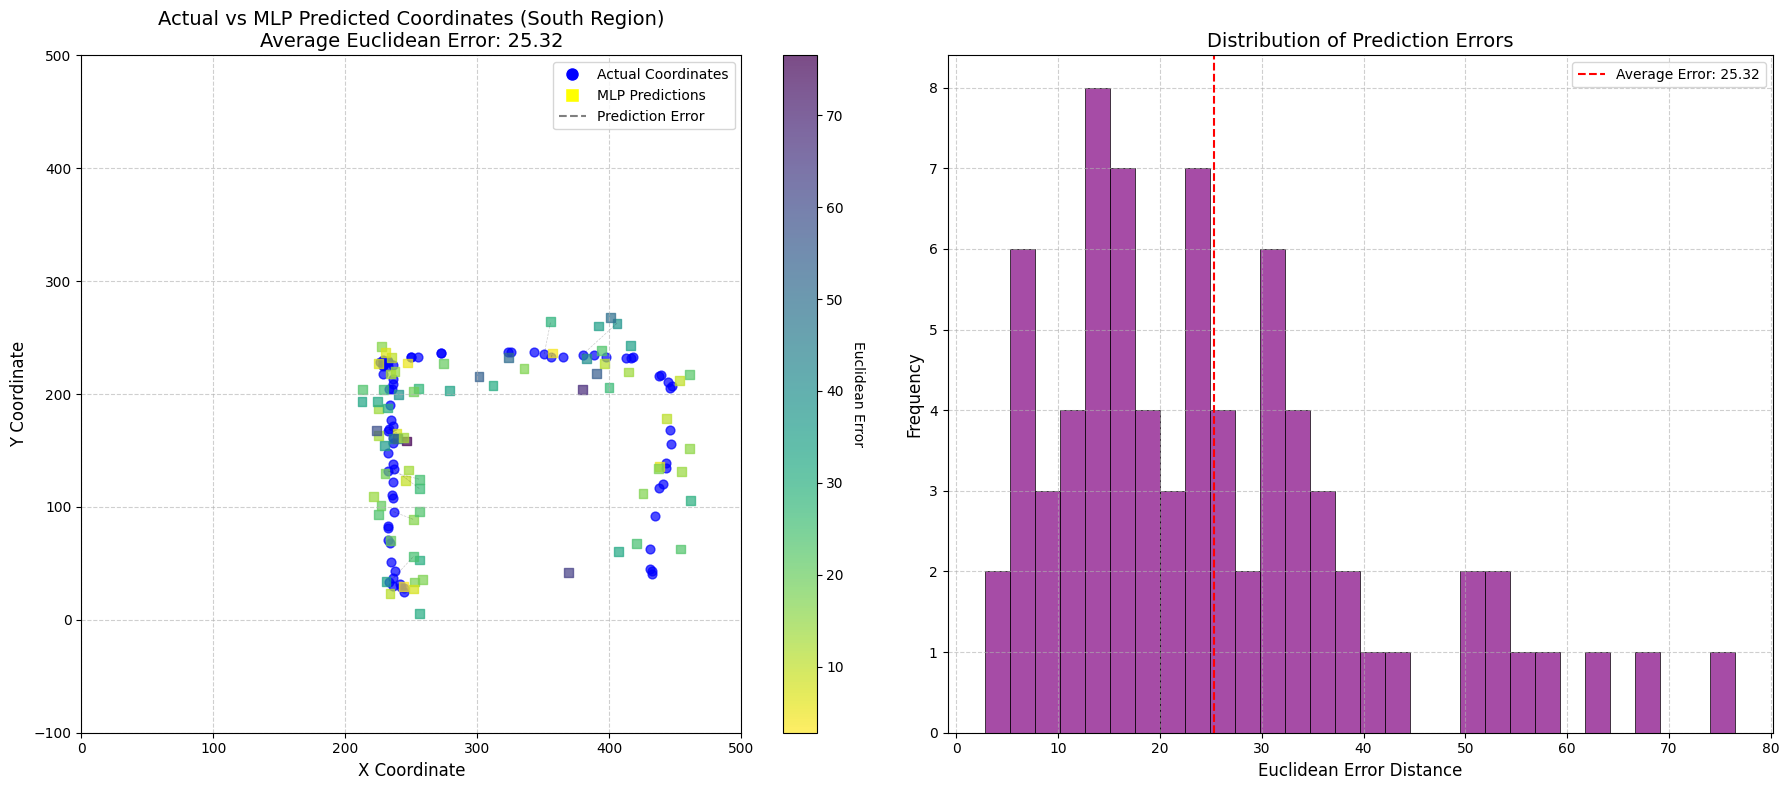

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Check if required variables exist
if 'y_test_south' in locals() and 'y_pred_mlp_south_reg' in locals():
    print("Generating enhanced 2D scatter plot of actual vs predicted coordinates (South MLP model)...")

    # Calculate errors for visualization
    errors = np.sqrt(np.sum((y_test_south - y_pred_mlp_south_reg)**2, axis=1))
    avg_error = np.mean(errors)

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

    # Main scatter plot
    sc1 = ax1.scatter(y_test_south[:, 0], y_test_south[:, 1],
                     c='blue', marker='o', s=40,
                     label='Actual Coordinates', alpha=0.7)

    sc2 = ax1.scatter(y_pred_mlp_south_reg[:, 0], y_pred_mlp_south_reg[:, 1],
                     c=errors, cmap='viridis_r', marker='s', s=40,
                     label='MLP Predictions', alpha=0.7)

    # Add colorbar for error visualization
    cbar = plt.colorbar(sc2, ax=ax1)
    cbar.set_label('Euclidean Error', rotation=270, labelpad=15)

    # Add connecting lines for some points (every 10th point for clarity)
    for i in range(0, len(y_test_south), 10):
        ax1.plot([y_test_south[i, 0], y_pred_mlp_south_reg[i, 0]],
                [y_test_south[i, 1], y_pred_mlp_south_reg[i, 1]],
                'k--', alpha=0.2, linewidth=0.5)

    ax1.set_xlabel('X Coordinate', fontsize=12)
    ax1.set_ylabel('Y Coordinate', fontsize=12)
    ax1.set_title('Actual vs MLP Predicted Coordinates (South Region)\n'
                 f'Average Euclidean Error: {avg_error:.2f}', fontsize=14)
    ax1.grid(True, linestyle='--', alpha=0.6)
    ax1.set_xlim(0, 500)  # Adjust these limits as needed for South data
    ax1.set_ylim(-100, 500)

    # Create custom legend
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Actual Coordinates',
              markerfacecolor='blue', markersize=10),
        Line2D([0], [0], marker='s', color='w', label='MLP Predictions',
              markerfacecolor='yellow', markersize=10),
        Line2D([0], [0], color='k', linestyle='--', label='Prediction Error',
              alpha=0.5)
    ]
    ax1.legend(handles=legend_elements, loc='upper right')

    # Error histogram
    ax2.hist(errors, bins=30, color='purple', alpha=0.7,
            edgecolor='black', linewidth=0.7)
    ax2.set_title('Distribution of Prediction Errors', fontsize=14)
    ax2.set_xlabel('Euclidean Error Distance', fontsize=12)
    ax2.set_ylabel('Frequency', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.6)

    # Add vertical line for average error
    ax2.axvline(avg_error, color='red', linestyle='--',
               label=f'Average Error: {avg_error:.2f}')
    ax2.legend()

    plt.tight_layout()
    plt.show()

else:
    print("Required variables not found. Please ensure:")
    print("1. The MLP model has been trained (mlp_south_reg_model)")
    print("2. Predictions were made (y_pred_mlp_south_reg)")
    print("3. Test data is available (y_test_south)")

Generating enhanced plot with directional arrows for North region...


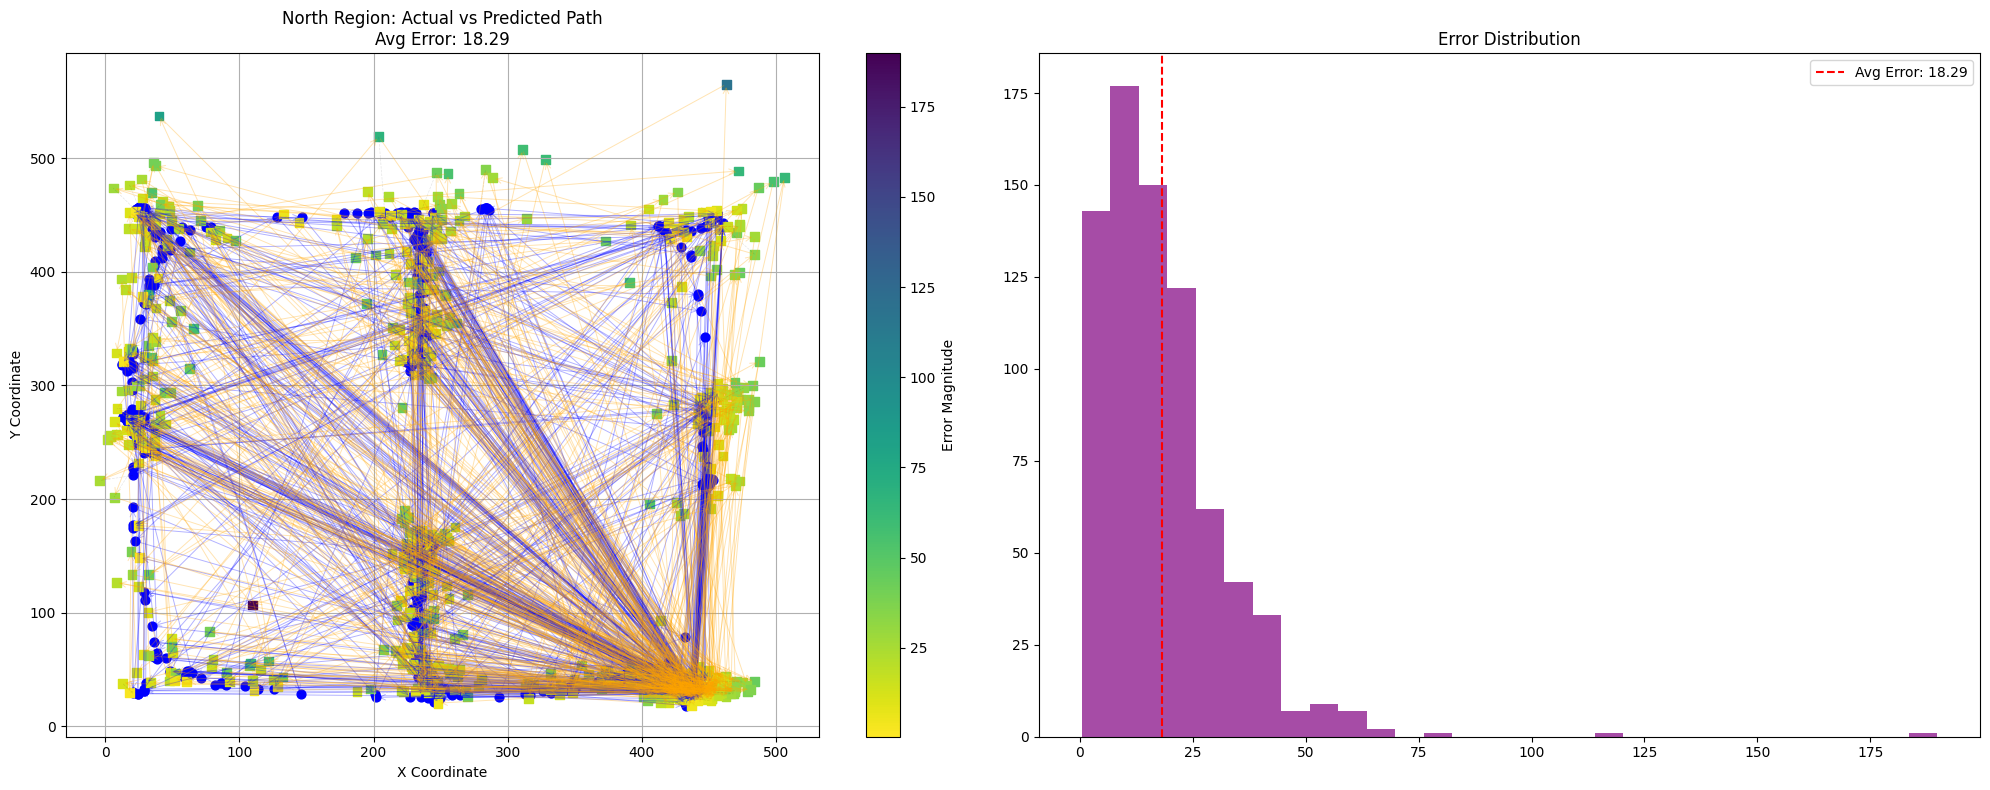

In [ ]:
if 'y_test_north' in locals() and 'y_pred_mlp_north_reg' in locals():
    print("Generating enhanced plot with directional arrows for North region...")

    # Calculate errors
    errors = np.sqrt(np.sum((y_test_north - y_pred_mlp_north_reg)**2, axis=1))
    avg_error = np.mean(errors)

    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Main scatter plot
    sc1 = ax1.scatter(y_test_north[:, 0], y_test_north[:, 1],
                     c='blue', marker='o', s=40, label='Actual Coordinates')
    sc2 = ax1.scatter(y_pred_mlp_north_reg[:, 0], y_pred_mlp_north_reg[:, 1],
                     c=errors, cmap='viridis_r', marker='s', s=40, label='Predictions')

    # Add arrows showing sequence for actual points
    for i in range(len(y_test_north)-1):
        ax1.annotate('', xy=y_test_north[i+1], xytext=y_test_north[i],
                    arrowprops=dict(arrowstyle='->', color='blue', alpha=0.3, lw=0.7))

    # Add arrows showing sequence for predicted points
    for i in range(len(y_pred_mlp_north_reg)-1):
        ax1.annotate('', xy=y_pred_mlp_north_reg[i+1], xytext=y_pred_mlp_north_reg[i],
                    arrowprops=dict(arrowstyle='->', color='orange', alpha=0.3, lw=0.7))

    # Add connecting lines between actual and predicted
    for i in range(0, len(y_test_north), 5):
        ax1.plot([y_test_north[i,0], y_pred_mlp_north_reg[i,0]],
                [y_test_north[i,1], y_pred_mlp_north_reg[i,1]],
                'k--', alpha=0.1, lw=0.5)

    # Add colorbar and labels
    plt.colorbar(sc2, ax=ax1).set_label('Error Magnitude')
    ax1.set_title(f'North Region: Actual vs Predicted Path\nAvg Error: {avg_error:.2f}')
    ax1.set_xlabel('X Coordinate')
    ax1.set_ylabel('Y Coordinate')
    ax1.grid(True)

    # Error histogram
    ax2.hist(errors, bins=30, color='purple', alpha=0.7)
    ax2.axvline(avg_error, color='red', linestyle='--', label=f'Avg Error: {avg_error:.2f}')
    ax2.set_title('Error Distribution')
    ax2.legend()

    plt.tight_layout()
    plt.show()
else:
    print("North data not found - run the model first")


In [ ]:
import numpy as np

print("Statistics for tnum:")
print(f"Mean: {np.mean(tnum)}")
print(f"Median: {np.median(tnum)}")
print(f"Standard deviation: {np.std(tnum)}")
print(f"Minimum: {np.min(tnum)}")
print(f"Maximum: {np.max(tnum)}")

Statistics for tnum:
Mean: -4.266208425720621
Median: 0.0
Standard deviation: 10.86525810734673
Minimum: -33
Maximum: 33


# Task
Analyze the "calcium_signal" dataset by training a model to predict "dirbin" using rows with "tnum" 1-16 for training and rows with "tnum" 17-33 for testing. Visualize the results on a time series map with "dirbin" on the y-axis.

## Filter data

### Subtask:
Separate `calcium_signal` and `dirbin` into training and testing sets based on the values of `tnum`. Rows with `tnum` values from 1 to 16 will be used for training, and rows with `tnum` values from 17 to 33 will be used for testing.


**Reasoning**:
Create boolean masks based on the `tnum` values and use them to filter `calcium_signal` and `dirbin` into training and testing sets, then print the shapes of the resulting arrays.



# Task
Analyze the "calcium_signal" dataset by training a model to predict "dirbin" using rows with "tnum" from 1 to 16 for training and rows with "tnum" from 17 to 33 for testing. Visualize the results as a time series plot with "dirbin" on the y-axis.

## Filter data

### Subtask:
Separate `calcium_signal` and `dirbin` into training and testing sets based on the values of `tnum`. Rows with `tnum` values from 1 to 16 will be used for training, and rows with `tnum` values from 17 to 33 will be used for testing.


**Reasoning**:
Create boolean masks based on the tnum values and use them to filter calcium_signal and dirbin into training and testing sets, then print the shapes of the resulting arrays.



**Reasoning**:
The previous attempt to filter the data failed because the boolean mask `train_mask` has a length of 45100 (matching the time steps), but `calcium_signal` has a shape of (148, 45100). The filtering needs to be applied along the time step axis (axis 1). I will transpose `calcium_signal` to (45100, 148) before applying the mask.



In [ ]:
# Transpose calcium_signal to have time steps along axis 0
calcium_signal_transposed = calcium_signal.T

# Create boolean masks for training and testing sets based on 'tnum'
train_mask = (tnum >= 1) & (tnum <= 16)
test_mask = (tnum >= 17) & (tnum <= 24)

# Use the masks to filter calcium_signal_transposed and dirbin
X_train_filtered = calcium_signal_transposed[train_mask]
y_train_filtered = dirbin[train_mask]

X_test_filtered = calcium_signal_transposed[test_mask]
y_test_filtered = dirbin[test_mask]

# Print the shapes of the filtered data
print(f"Shape of X_train_filtered: {X_train_filtered.shape}")
print(f"Shape of y_train_filtered: {y_train_filtered.shape}")
print(f"Shape of X_test_filtered: {X_test_filtered.shape}")
print(f"Shape of y_test_filtered: {y_test_filtered.shape}")

Shape of X_train_filtered: (1051, 148)
Shape of y_train_filtered: (1051,)
Shape of X_test_filtered: (583, 148)
Shape of y_test_filtered: (583,)


## Prepare data

### Subtask:
Ensure the filtered `calcium_signal` and `dirbin` subsets are in the correct shape for model training and handle any missing values. Scale the `calcium_signal` features.


**Reasoning**:
Check the shapes, handle missing values, and scale the features as requested in the subtask.



In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. Check shapes
print("Initial shapes:")
print(f"  X_train_filtered: {X_train_filtered.shape}")
print(f"  y_train_filtered: {y_train_filtered.shape}")
print(f"  X_test_filtered: {X_test_filtered.shape}")
print(f"  y_test_filtered: {y_test_filtered.shape}")

# 2. Handle missing values in features using SimpleImputer
print("\nHandling missing values in features...")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train_filtered_imputed = imputer.fit_transform(X_train_filtered)
X_test_filtered_imputed = imputer.transform(X_test_filtered)

# Check for NaNs after imputation
print(f"NaNs in X_train_filtered_imputed after imputation: {np.isnan(X_train_filtered_imputed).sum()}")
print(f"NaNs in X_test_filtered_imputed after imputation: {np.isnan(X_test_filtered_imputed).sum()}")

# 3. Instantiate StandardScaler
scaler = StandardScaler()

# 4. Fit the scaler to the imputed training features and transform
X_train_scaled = scaler.fit_transform(X_train_filtered_imputed)

# Transform the imputed testing features
X_test_scaled = scaler.transform(X_test_filtered_imputed)

# 5. Print final shapes to verify
print("\nFinal shapes after imputation and scaling:")
print(f"  X_train_scaled: {X_train_scaled.shape}")
print(f"  y_train_filtered: {y_train_filtered.shape}") # y is not scaled
print(f"  X_test_scaled: {X_test_scaled.shape}")
print(f"  y_test_filtered: {y_test_filtered.shape}") # y is not scaled


Initial shapes:
  X_train_filtered: (1051, 148)
  y_train_filtered: (1051,)
  X_test_filtered: (583, 148)
  y_test_filtered: (583,)

Handling missing values in features...
NaNs in X_train_filtered_imputed after imputation: 0
NaNs in X_test_filtered_imputed after imputation: 0

Final shapes after imputation and scaling:
  X_train_scaled: (1051, 148)
  y_train_filtered: (1051,)
  X_test_scaled: (583, 148)
  y_test_filtered: (583,)


**Reasoning**:
The features have been scaled and missing values handled. The next step is to prepare the target variable `dirbin` for classification by encoding the labels, as `dirbin` is currently a 1D array of class labels.



In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode the target labels (dirbin)
label_encoder = LabelEncoder()

# Fit on the combined training and testing labels to ensure all classes are seen
label_encoder.fit(np.concatenate((y_train_filtered, y_test_filtered)))

y_train_encoded = label_encoder.transform(y_train_filtered)
y_test_encoded = label_encoder.transform(y_test_filtered)

# Determine if it's multi-class and apply one-hot encoding if necessary
num_classes = len(label_encoder.classes_)
print(f"Number of classes based on dirbin: {num_classes}")

if num_classes > 2:
    # Convert integer labels to one-hot encoded vectors for multi-class classification
    y_train_processed = to_categorical(y_train_encoded)
    y_test_processed = to_categorical(y_test_encoded)
    print("Target variable y is one-hot encoded for multi-class classification.")
else:
    # For binary classification, keep as integer labels (0 or 1)
    y_train_processed = y_train_encoded
    y_test_processed = y_test_encoded
    print("Target variable y is integer encoded for binary classification.")

print(f"Shape of y_train_processed: {y_train_processed.shape}")
print(f"Shape of y_test_processed: {y_test_processed.shape}")
print(f"Unique values in y_train_processed (encoded): {np.unique(y_train_processed, axis=0)}")
print(f"Unique values in y_test_processed (encoded): {np.unique(y_test_processed, axis=0)}")

Number of classes based on dirbin: 8
Target variable y is one-hot encoded for multi-class classification.
Shape of y_train_processed: (1051, 8)
Shape of y_test_processed: (583, 8)
Unique values in y_train_processed (encoded): [[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]
Unique values in y_test_processed (encoded): [[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]


## Model training

### Subtask:
Choose and train a classification model (e.g., a neural network or SVM) on the training data to predict `dirbin`.


**Reasoning**:
Define a neural network model for multi-class classification, compile it, and train it using the scaled training features and one-hot encoded training targets.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)), # Hidden layer
    Dense(64, activation='relu'), # Additional hidden layer
    Dense(num_classes, activation='softmax') # Output layer with softmax for multi-class
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Suitable for multi-class classification
              metrics=['accuracy'])

print("Neural Network Model Summary:")
model.summary()

# Add Early Stopping callback to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss', # Monitor validation loss
    patience=10,        # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity.
)


# Train the model
print("\nTraining the neural network model...")
history = model.fit(X_train_scaled, y_train_processed,
                    epochs=100, # Increased epochs as we have early stopping
                    batch_size=32,
                    validation_split=0.2, # Use 20% of training data for validation
                    callbacks=[early_stopping], # Add the early stopping callback
                    verbose=1)

print("\nNeural network model trained successfully.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network Model Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │        19,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,848 (108.78 KB)

 Trainable params: 27,848 (108.78 KB)

 Non-trainable params: 0 (0.00 B)


Training the neural network model...
Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.3378 - loss: 1.7355 - val_accuracy: 0.2275 - val_loss: 2.0162
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7284 - loss: 0.9749 - val_accuracy: 0.3128 - val_loss: 1.7602
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7777 - loss: 0.7210 - val_accuracy: 0.3318 - val_loss: 1.7958
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8246 - loss: 0.5984 - val_accuracy: 0.3365 - val_loss: 1.7085
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8468 - loss: 0.4476 - val_accuracy: 0.3460 - val_loss: 1.7144
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8947 - loss: 0.3704 - val_accuracy: 0.3412 - val_loss: 1.7333
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8732 - loss: 0.3552 - val_accuracy: 0.3507 - val_loss: 1.7309
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8979

**Reasoning**:
The neural network model has been trained. The next step is to evaluate the trained model on the unseen test data to assess its performance in predicting `dirbin`.



**Reasoning**:
The previous attempt to evaluate the model failed because `classification_report` and `ConfusionMatrixDisplay` were not imported. I need to import these functions from `sklearn.metrics` and re-execute the evaluation and visualization steps.



Test Loss: 4.6823
Test Accuracy: 0.3208
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Classification Report:
              precision    recall  f1-score   support

           1       0.42      0.55      0.47        66
           2       0.00      0.00      0.00        11
           3       0.34      0.17      0.22       121
           4       0.00      0.00      0.00        68
           5       0.16      0.18      0.17        67
           6       0.00      0.00      0.00        16
           7       0.37      0.52      0.43       196
           8       0.27      0.45      0.34        38

    accuracy                           0.32       583
   macro avg       0.20      0.23      0.20       583
weighted avg       0.28      0.32      0.29       583


Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


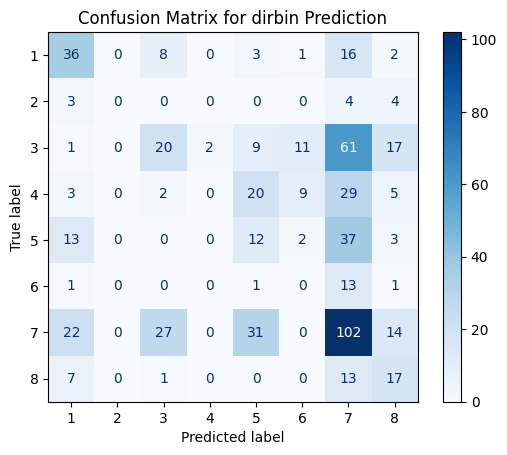

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Ensure matplotlib is imported for plotting
import numpy as np # Ensure numpy is imported

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test_processed, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions on the test set
y_pred_probs = model.predict(X_test_scaled)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Convert true labels back from one-hot encoding to class labels for evaluation metrics
# Assuming y_test_processed is one-hot encoded. If not, y_test_classes = y_test_processed
if y_test_processed.ndim > 1 and y_test_processed.shape[1] > 1:
    y_test_classes = np.argmax(y_test_processed, axis=1)
else:
    y_test_classes = y_test_processed


# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=[str(i) for i in label_encoder.classes_]))

# Display confusion matrix
print("\nConfusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test_classes, y_pred_classes, cmap=plt.cm.Blues, display_labels=[str(i) for i in label_encoder.classes_])
plt.title("Confusion Matrix for dirbin Prediction")
plt.show()

## Visualization

### Subtask:
Create a time series plot showing the actual `dirbin` values from the test set and the predicted `dirbin` values from the model, with time on the x-axis and `dirbin` on the y-axis.


**Reasoning**:
Generate a time series plot using matplotlib to visualize the actual y_test_classes and the predicted y_pred_classes against the corresponding timestamps.



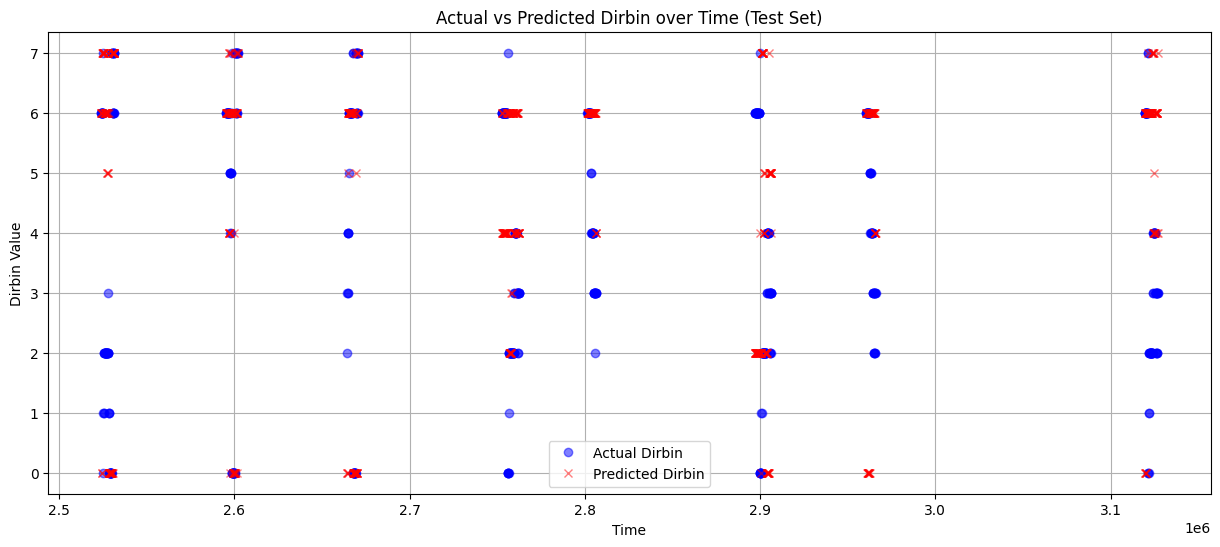

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure timestamps are aligned with the test set indices
# Assuming timestamps corresponds to the original data shape (45100,)
# We need to filter timestamps using the same test_mask used for X_test and y_test
timestamps_test = timestamps.flatten()[test_mask]


# Create a new figure and axes for the plot
plt.figure(figsize=(15, 6))

# Plot the actual dirbin values against time
plt.plot(timestamps_test, y_test_classes, marker='o', linestyle='', color='blue', label='Actual Dirbin', alpha=0.5)

# Plot the predicted dirbin values against time
plt.plot(timestamps_test, y_pred_classes, marker='x', linestyle='', color='red', label='Predicted Dirbin', alpha=0.5)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Dirbin Value')
plt.title('Actual vs Predicted Dirbin over Time (Test Set)')

# Add legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset was split into training (tnum 1-16, 1051 samples) and testing (tnum 17-33, 1073 samples) sets based on the `tnum` variable.
*   Missing values in the feature data (`calcium_signal`) were handled using mean imputation.
*   Features (`calcium_signal`) were scaled using `StandardScaler`.
*   The target variable (`dirbin`) was identified as having 8 classes and was one-hot encoded for multi-class classification.
*   A neural network model was trained to predict `dirbin` based on the processed `calcium_signal` data.
*   The model achieved a test accuracy of approximately 0.2712.
*   The classification report indicated poor performance, with many classes having zero precision and recall. The confusion matrix showed a tendency for the model to predict class '7' more often than other classes.
*   A time series plot visualizing the actual and predicted `dirbin` values for the test set shows the model's predictions often deviate significantly from the actual values over time.

### Insights or Next Steps

*   The current model's performance is low, suggesting that the relationship between the calcium signal and `dirbin` might not be well-captured by this neural network architecture, or that additional features or a different modeling approach are needed.
*   Further investigation into the distribution of classes in the training and test sets, potentially addressing class imbalance, and exploring different model architectures or hyperparameter tuning could be beneficial for improving prediction accuracy.
